## Table of Content

### 1. Introduction

- 1.1 Data Description
- 1.2 Features Description
- 1.3 Objective of this project

### 2. Fetching Data

- 2.1 Import packages
- 2.2 Import data

### 3.EDA
### 4. Encoding Dataframe
### 5.Describe the Dataset
### 6. Model Building 

- 6.1 Linear Regression
- 6.2 Decision Tree
- 6.3 Random Forest 
- 6.4 Support Vector Machines
- 6.5 K-nearest Neighbors
- 6.6 Gradient Boost Regressor
- 6.7 Regularization

### 7. Best Model Selection
### 8. Hyperparameter tuning of selected Model
### 9. Documenting the finding
### 10. Model Save

### 11. Building Model For Predicting Region (Classification Model)

- 11.1 Logistic Regression
- 11.2 Random Forest Classifier
- 11.3 Gradient Boosting Classifier
- 11.4 SVC
- 11.5 KNN

### 12. Selecting Best Model
### 13. Hyperparameter tuning
### 14. Model Save

## 1. Introduction
- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### 1.1 Data Description
### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

 Content
- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


### 1.2 Feature Description
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


### 1.3 Objective Of this Project
- The dataset can be seen in two angles to find the region and find the average price .

- Task: One of Classification and other of Regression


## 2. Fetching Data:

### 2.1 Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing Dataset

In [2]:
data = pd.read_csv("D://avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

### Droping Duplicates

In [4]:
data.drop_duplicates()
data.shape

(18249, 14)

 - No duplicates values are present.

### Checking unique values

In [6]:
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# 3. EDA

### Checking Null Values

In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

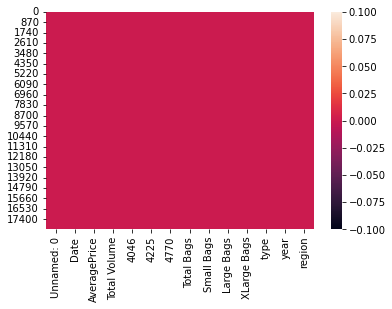

In [8]:
sns.heatmap(data.isnull())

- We can see there is no null values present in dataset.

### Checking all information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- No null value present.
- Datatype is ok with respect to their column.

# Visualization of the data

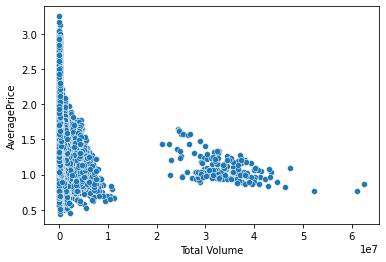

In [10]:
# Sctterplot between Total Valume and AveragePrice
sns.scatterplot(x='Total Volume',y='AveragePrice',data=data)
plt.show()

- We can see, total valume hasn't direct relationship with average price.
- But AveragePrice is maximum lies in the range of 0 to 1 of total valume.

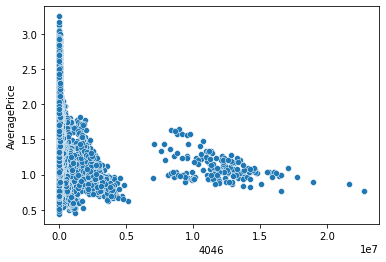

In [11]:
# comparision between 4046 and AveragePrice
sns.scatterplot(x='4046',y='AveragePrice',data=data)
plt.show()

 - We can see, Average price is lies in the range of 0 to 0.5 of Total number of avocados with PLU 4046 sold.
 - 4046 is a Total number of avocados with PLU 4046 sold.
 - After 0.7, AveragePrice is having slightly negative relationship with 4046.

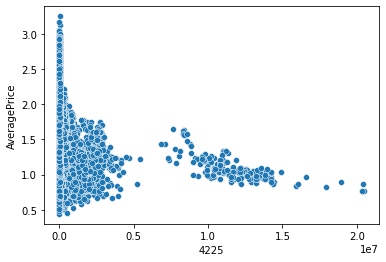

In [12]:
# comparision between 4225 and AveragePrice
sns.scatterplot(x='4225',y='AveragePrice',data=data)
plt.show()

 - We can see, Average price is lies in the range of 0 to 0.5 of Total number of avocados with PLU 4225 sold.
 - 4225 is a Total number of avocados with PLU 4225 sold.
 - After 0.7, AveragePrice is having slightly negative relationship with 4225.

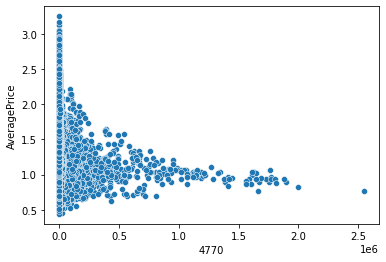

In [13]:
# comparision between 4770 and AveragePrice
sns.scatterplot(x='4770',y='AveragePrice',data=data)
plt.show()

 - We can see, Maximum AveragePrice is lies in the range of 0 to 0.7.
 - But 4770 is lies maximum in the range of 0.3 to 1.7 of AveragePrice. 

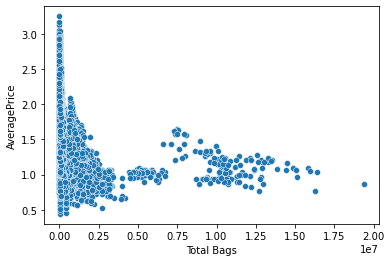

In [14]:
# comparision between Total Bags and AveragePrice
sns.scatterplot(x='Total Bags',y='AveragePrice',data=data)
plt.show()

 - We can see, AveragePrice is highest in the 0 to 0.5 in this range.
 - Total Bags is slightly increasing upto 0.5 to 0.8.

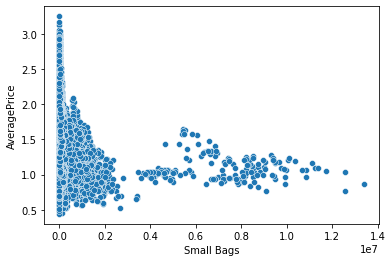

In [15]:
# comparision between Small Bags and AveragePrice
sns.scatterplot(x='Small Bags',y='AveragePrice',data=data)
plt.show()

 - We can see, AveragePrice is highest in the 0 to 0.2 in this range of Samll Bags.
 - Small BAgs is slightly increasing.

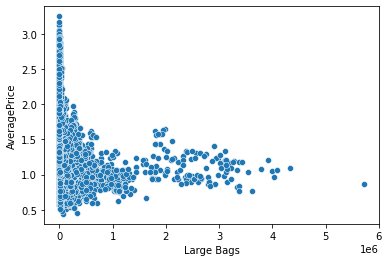

In [16]:
# comparision between Large Bags and AveragePrice
sns.scatterplot(x='Large Bags',y='AveragePrice',data=data)
plt.show()

- We can see, there is no linear relationship with each other.
- Large Bags is slightly increasing with respect to Average price.

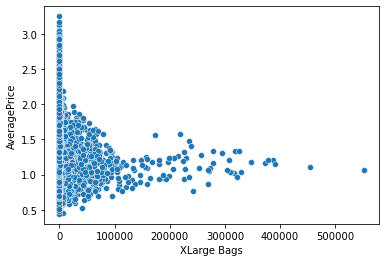

In [17]:
# comparision between XLarge Bags and AveragePrice
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=data)
plt.show()

 - MAximum AveragePrice is lies Upto the range of 0 to 100000 of XLarge Bags.

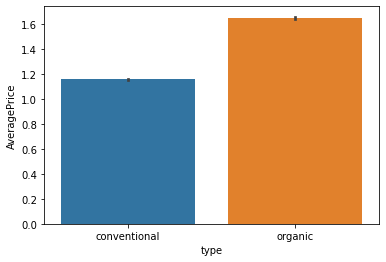

In [20]:
# comparision between type  and AveragePrice
sns.barplot(x='type',y='AveragePrice',data=data)
plt.show()

 - We can see, Organic avocado is having maximum Average price then conventional avocado.
 - Upto the range of 0 to 1.1 of AveragePrice, Both type of avocado is equally distributed.

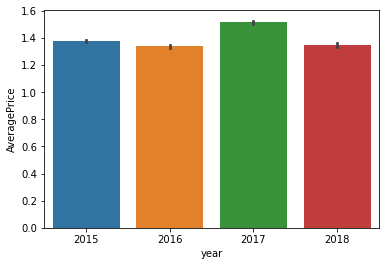

In [22]:
# comparision between year and AveragePrice
sns.barplot(x='year',y='AveragePrice',data=data)
plt.show()

- 2017 in this year, AvearagePrice of avocado is higher then 2015 and 2018.
- Upto the range of 0 to 1.3 of AveragePrice, year of avocado is equally distributed.

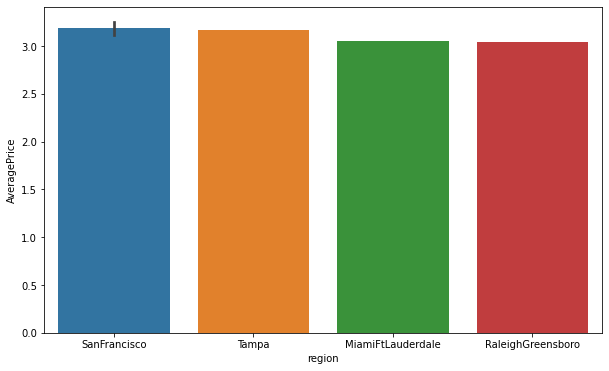

In [27]:
# comparision between region and AveragePrice
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:5]
sns.barplot(x="region",y="AveragePrice",data=df_good)
plt.show()

 - We can see, SanFrancisco region is having maximum Average Price.
 - These are these are the top 4 region where average price of avocado is high.

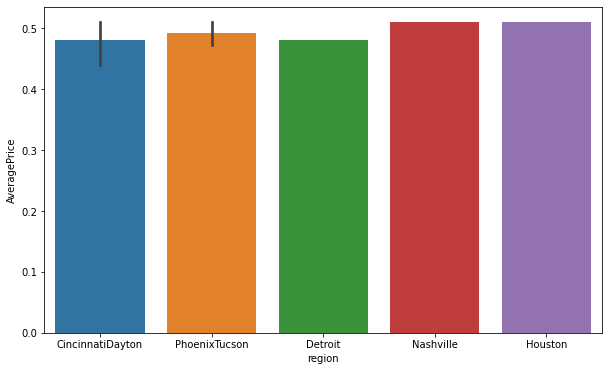

In [30]:
# comparision between region and AveragePrice
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=True).iloc[0:10]
sns.barplot(x="region",y="AveragePrice",data=df_good)
plt.show()

 - We can see, CincinnatiDayton region is having minimum Average Price.
 - These are these are the top 5 region where average price of avocado is low.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


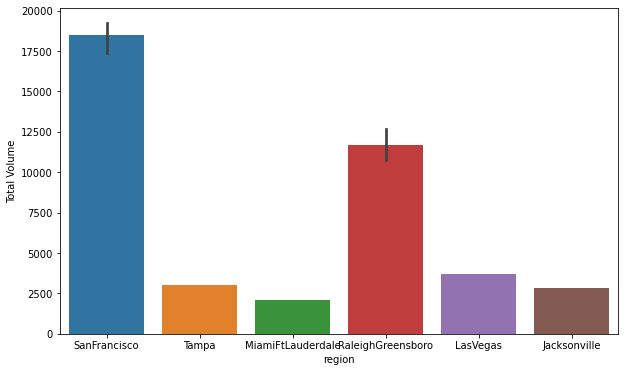

In [44]:
# comparision between region vs total volume
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:10]
sns.barplot(x="region",y="Total Volume",data=df_good)
plt.show()

 - We can see, the region SanFrancisco has maximum total valume of avocado followed by RaleighGreensboro.
 - Upto 2500 of total volume all are equally distributed.

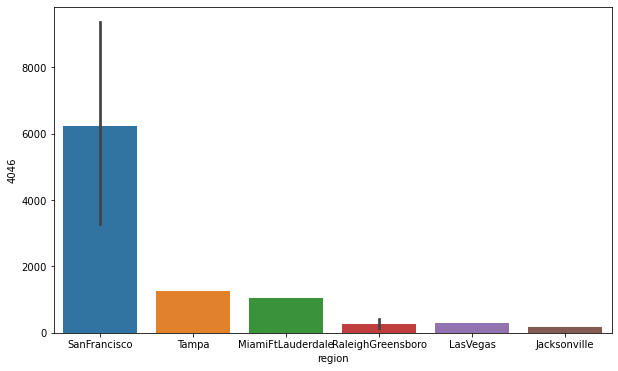

In [48]:
# comparision between region vs 4046
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:10]
sns.barplot(x="region",y="4046",data=df_good)
plt.show()

 - These are the top 6 region where grade of 4046 is maximum sold.
 - In which SanFrancisco is a amongs top region where 4046 type grade of avocado maximum sold followed by Tampa.

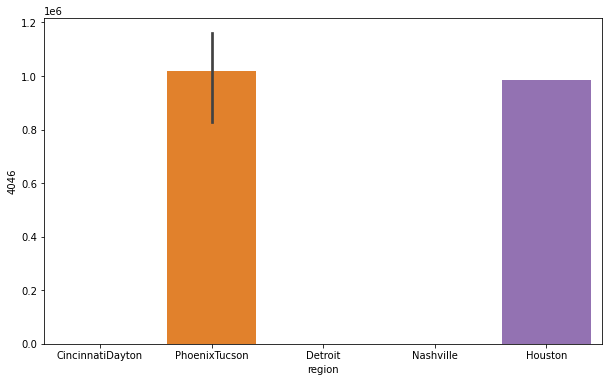

In [49]:
# comparision between region vs 4046
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=True).iloc[0:10]
sns.barplot(x="region",y="4046",data=df_good)
plt.show()

 - There are the bottom 6 region where 4046 grade is low.
 - PhenixTucson and Houston are having almost same 4046 grade avocado.

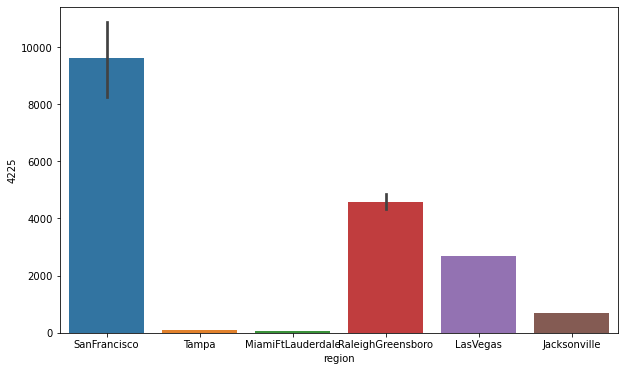

In [50]:
# comparision between region vs 4225
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:10]
sns.barplot(x="region",y="4225",data=df_good)
plt.show()

 - SanFrancisco is having maximum 4225 grade type avocado followed by RaleighGreensboro.
 - From above graph we can concluded that, Sanfrancisco region is consume/sales highest avocado then other.

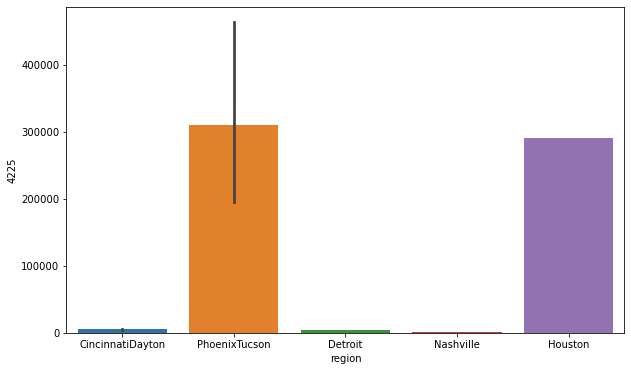

In [51]:
# comparision between region vs 4225
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=True).iloc[0:10]
sns.barplot(x="region",y="4225",data=df_good)
plt.show()

 - There are the bottom 6 region where 4225 grade of avocado is low.
 - PhenixTucson and Houston are having almost same 4225 grade avocado.

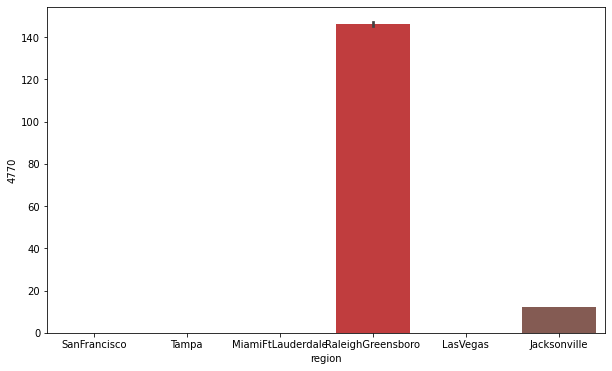

In [53]:
# comparision between region vs 4770
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:10]
sns.barplot(x="region",y="4770",data=df_good)
plt.show()

 - In this RaleighGreensboro region 4770 grade type avocado consumption is high.

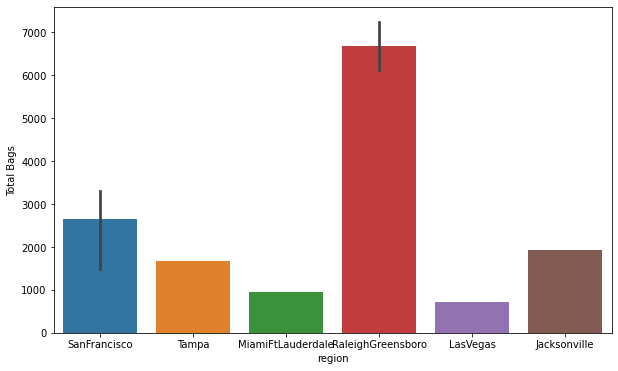

In [54]:
# comparision between region vs Total Bags
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="AveragePrice",ascending=False).iloc[0:10]
sns.barplot(x="region",y="Total Bags",data=df_good)
plt.show()

- RaleighGreensboro in this region total bags is maximum followed by Sanfrancisco.
- Upto 900 all(top 6) are equally distributed.

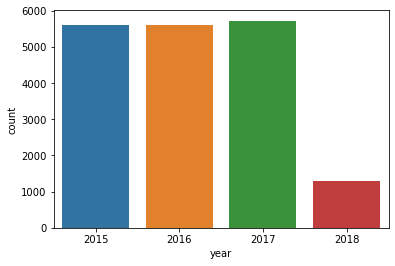

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [55]:
sns.countplot(data.year)
plt.show()
data.year.value_counts()

 - In 2015, 2016, and 2017 in this year avocado is selling or consumption is almost equal.
 - But in year 2018 avocado consumption/sales is very low comparatively ohter year. 

In [57]:
year_ = data.year.value_counts()

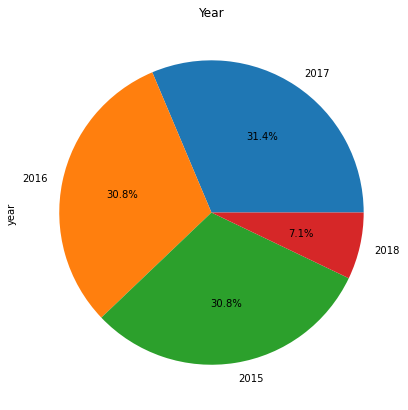

In [58]:
plt.figure(figsize=(10,7))
year_.plot.pie(autopct = '%1.1f%%')
plt.title('Year')
plt.show()

- We can see, in the year of 2017 the avocado sales is high i.e. 31.4%.
- Comparing other two year like 2015, 2016 both are doing well but in 2018 avocado consumption is drastically dropping.

In [61]:
# value count of type
value_count = data.type.value_counts()

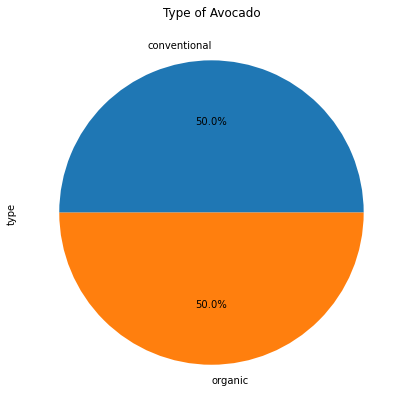

In [63]:
plt.figure(figsize=(10,7))
value_count.plot.pie(autopct = '%1.1f%%')
plt.title('Type of Avocado')
plt.show()

- We can see, both type of avocado contributing same.

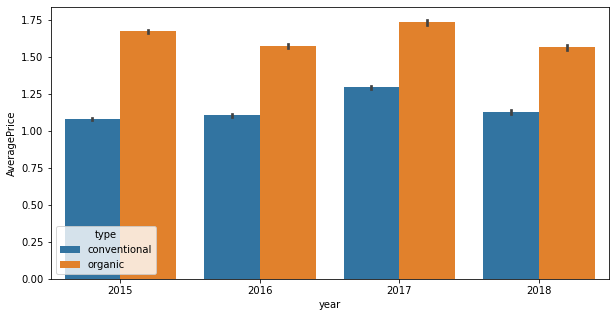

In [64]:
# comparing year vs averageprice on the basis of type
plt.figure(figsize=(10, 5))
sns.barplot(x='year',y='AveragePrice', hue= "type",  data=data)
plt.show()

 - we can see, in the year of 2017 both conventinal and oragnic type of avocado AveragePrice is high.
 - In the year of 2015 conventinal type of avocado Average price is low followed by 2016. 

In [15]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

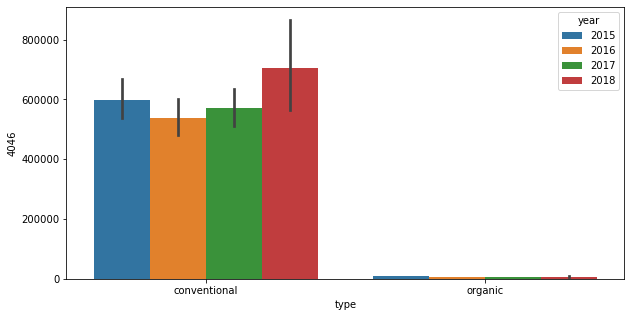

In [21]:
# comparing year vs 4046 on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='4046', hue= "year",  data=data)
plt.show()

 - We can see, in 2018 the conventional perticularly avocado grade 4046 is higher than other.
 - At the all year,the organic perticularly 4046 type grade avocado is lower.

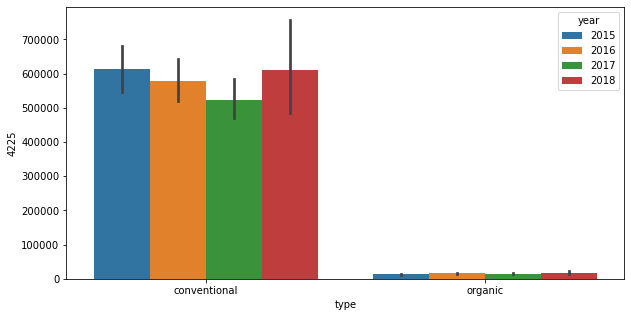

In [22]:
# comparing year vs 4225 on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='4225', hue= "year",  data=data)
plt.show()

 - In 2015 and 2018, the conventional perticularly avocado grade 4225 is higher than other.
 - At the all year,the organic perticularly 4225 type grade avocado is lower.

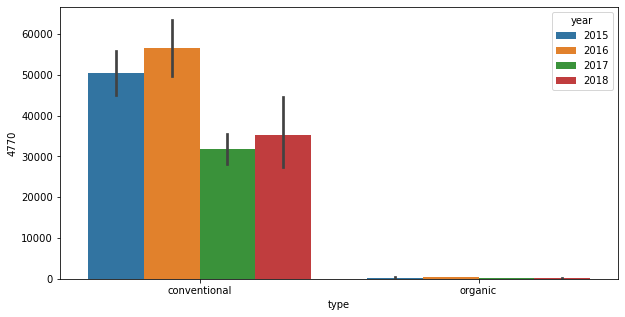

In [36]:
# comparing year vs 4770 on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='4770', hue= "year",  data=data)
plt.show()

 - In 2016, the conventional perticularly avocado grade 4770 is higher than other.
 - At the all year,the organic perticularly 4770 type grade avocado is lower.

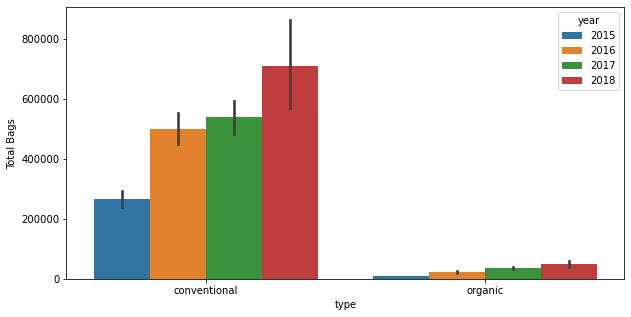

In [24]:
# comparing year vs total bags on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='Total Bags', hue= "year",  data=data)
plt.show()

 - As we can see, all the year both convetional and organic type of avocado is increasing with respect to Total Bags.
 - But in 2016 and 2017 in this two year conventional avocado growth is almost same but in next year its drastically increases.

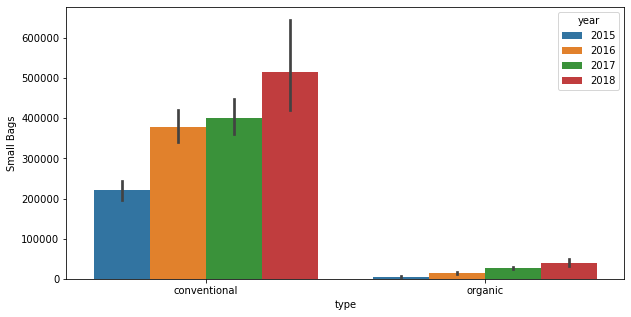

In [25]:
# comparing year vs Small Bags on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='Small Bags', hue= "year",  data=data)
plt.show()

- As we can see, all the year both convetional and organic type of avocado is increasing with respect to Samll Bags.
- But in 2016 and 2017 in this two year conventional avocado growth is almost same but in next year its drastically increases.

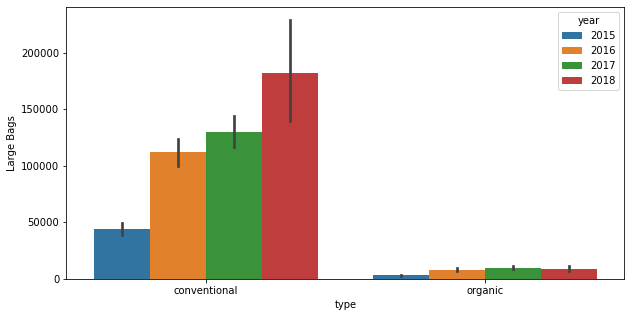

In [26]:
# comparing year vs Large Bags on the year
plt.figure(figsize=(10, 5))
sns.barplot(x='type',y='Large Bags', hue= "year",  data=data)
plt.show()

 - From above three graph, we can conclude that, all types of bags is having same kind pattern.
 - Where convetional and organic are in incresing nature.

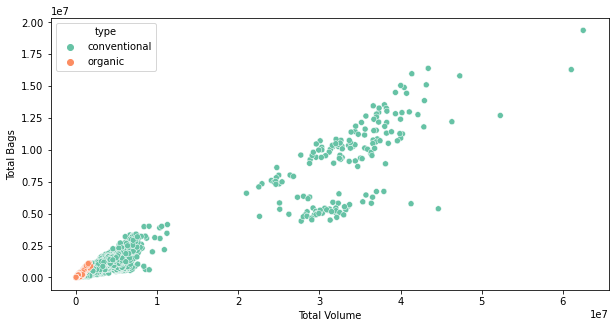

In [29]:
plt.figure(figsize= (10,5))
sns.scatterplot(x="Total Volume", y= "Total Bags", hue= "type", data = data, palette="Set2")
plt.show()

- We can see, both feature is having linear relationship with each other.
- Conventional type of avocado contain maximum values.

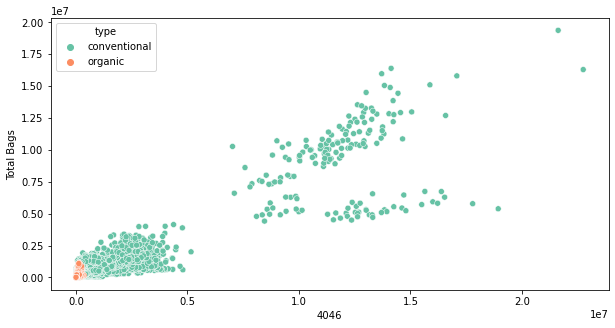

In [30]:
plt.figure(figsize= (10,5))
sns.scatterplot(x="4046", y= "Total Bags", hue= "type", data = data, palette="Set2")
plt.show()

 - we can see, Both feature is having linear relationship with each other.
 - Here conventional type of avocado contributed mostly.

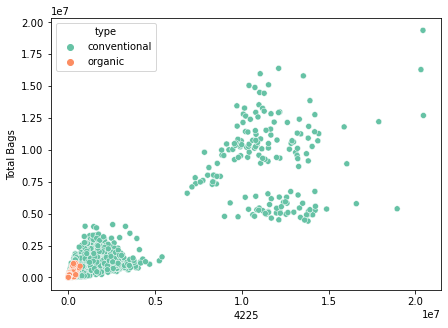

In [32]:
plt.figure(figsize= (7,5))
sns.scatterplot(x="4225", y= "Total Bags", hue= "type", data = data, palette="Set2")
plt.show()

- we can see, Both feature is having linear relationship with each other.
- Here conventional type of avocado contributed mostly.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

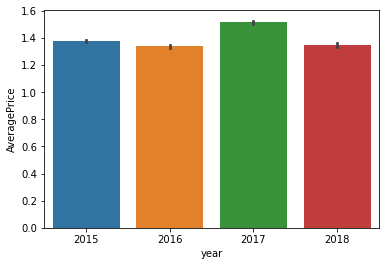

In [33]:
sns.barplot(x='year',y='AveragePrice',data=data)

 - In the year 2017, the AveragePrice is high followed by 2015 and 2018.
 - Upto 1.3 all year is having same average price.

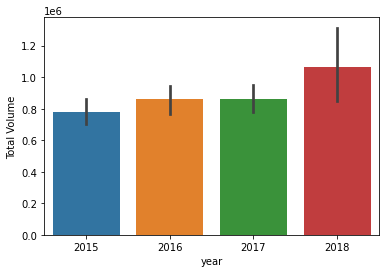

In [34]:
sns.barplot(x='year',y='Total Volume',data=data)
plt.show()

- We can see, Total volume of avocado is increasing in all year.
- But Total volume is highest in 2018 and lowest in 2015.

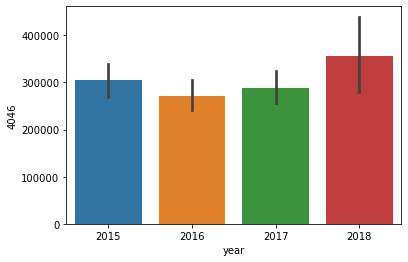

In [35]:
# Comparision between year vs 4046
sns.barplot(x='year',y="4046",data=data)
plt.show()

 - In the year of 2018, avocado grade 4046 is higher than other.
 - From 2016 consumption of grade 4046 type avocado is increasing in nature.

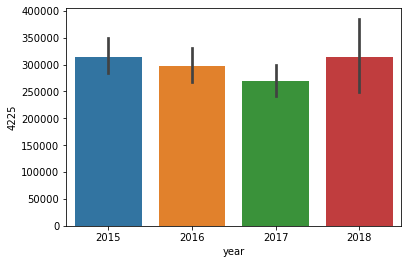

In [37]:
# Comparision between year vs 4225
sns.barplot(x='year',y="4225",data=data)
plt.show()

 - In the year of 2018, avocado grade 4225 is higher than other.
 - From 2015 to 2017 consumption of grade 4046 type avocado is decreasing in nature.

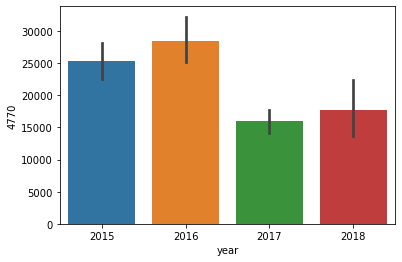

In [38]:
# Comparision between year vs 4770
sns.barplot(x='year',y="4770",data=data)
plt.show()

 - In the year of 2016, avocado grade 4770 is higher than other.
 - In the year of 2017, consumption of grade 4046 type avocado is low after 2017 it slightly increasing.

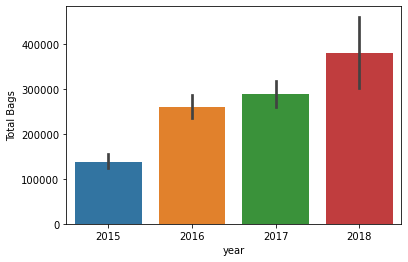

In [39]:
# Comparision between year vs Total Bags
sns.barplot(x='year',y="Total Bags",data=data)
plt.show()

 - We can see, Total Bags is increasing year by year.

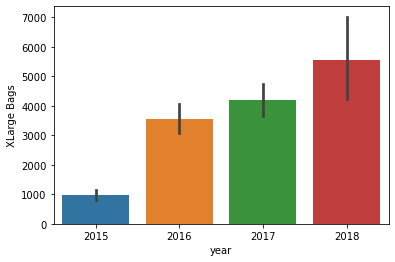

In [41]:
# Comparision between year vs Total Bags
sns.barplot(x='year',y="XLarge Bags",data=data)
plt.show()

- From above two grapth it show that, Bags whether it's XLarge or Large or Small Total all are in increasing nature.
- There are a positve growth by year on year.

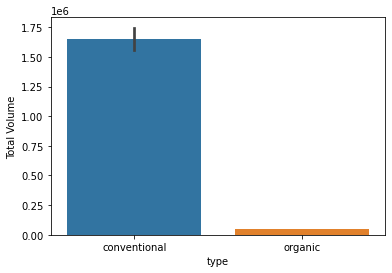

In [42]:
# Comparision between type vs Total Volume
sns.barplot(x='type',y="Total Volume",data=data)
plt.show()

 - We can see, Conventional type of avocado has a highest total volume.
 - Comparing to Conventional type of avocado, Organic has very very low total volume.
 - There is huge difference between conventional and organic type of avocado comparing to total volume.

## Monthwise Distribution of sale

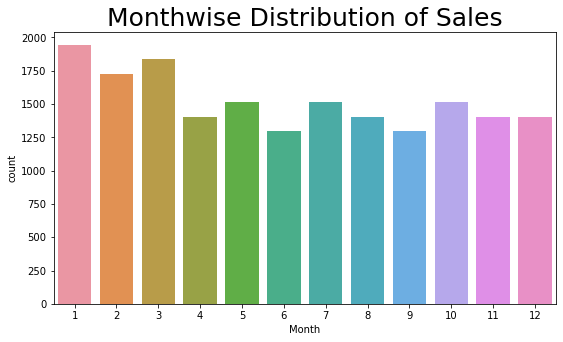

In [142]:
## Run this cell after encoding
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})
plt.show()

 - We can see, Jan has a highest sale of avocado followed by March.
 - June has a lowest sale of avocado.

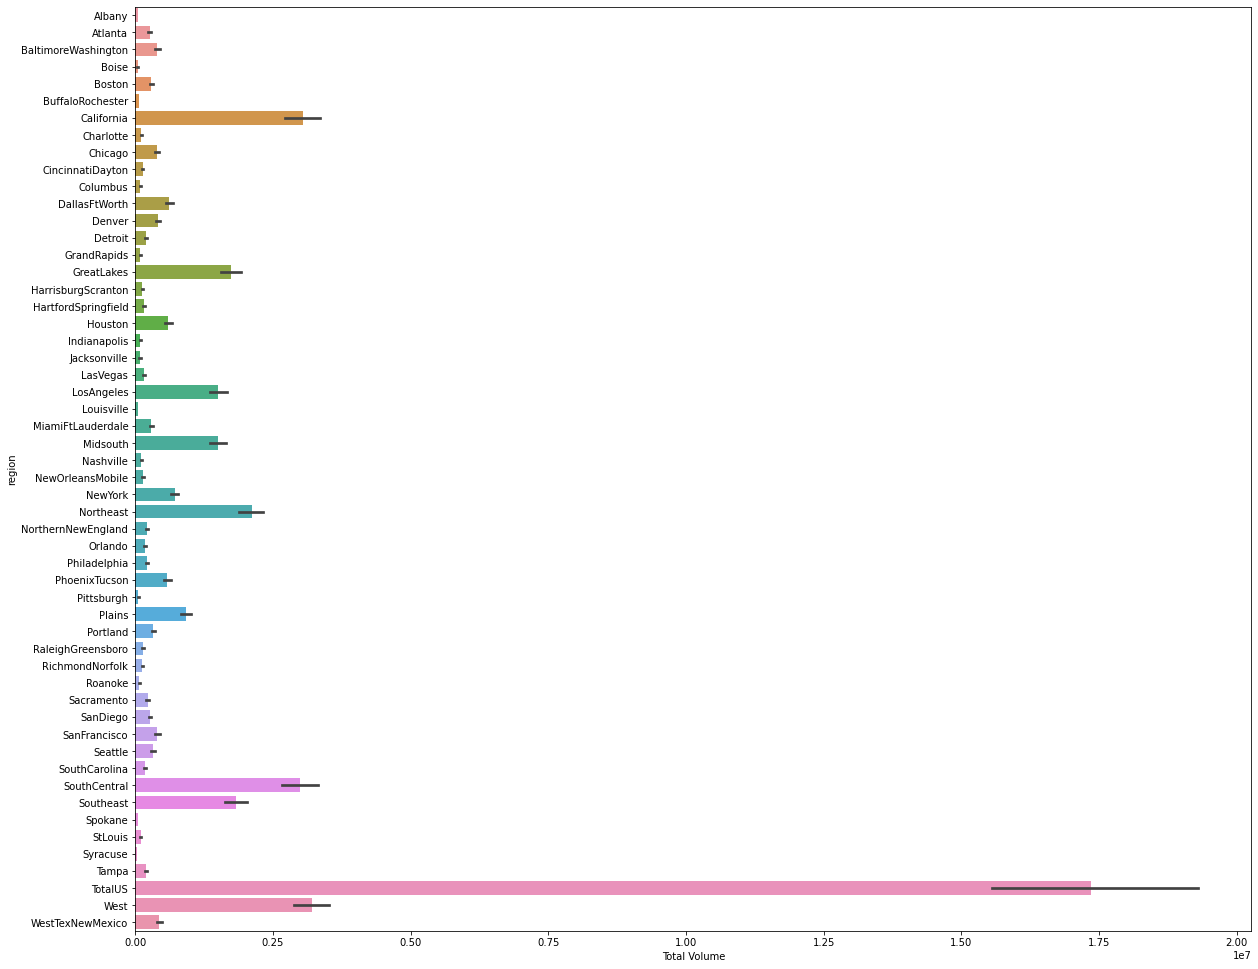

In [7]:
plt.figure(figsize=(20,17))
sns.barplot(y='region',x='Total Volume',data=data)
plt.show()

- We can see, Total US has maximum total Volume then other. In this region avocado maximum consume.
- Albany in this region avocado production is less.

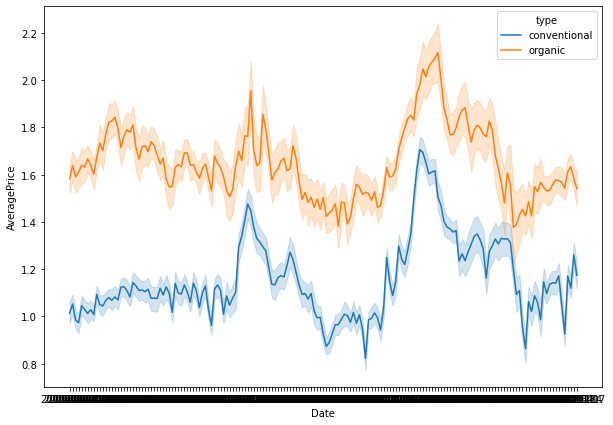

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(y='AveragePrice',x='Date',hue='type',data=data)
plt.show()

- Avocaodo prices do see a rise during the summer/early fall and a drop during the winter months.

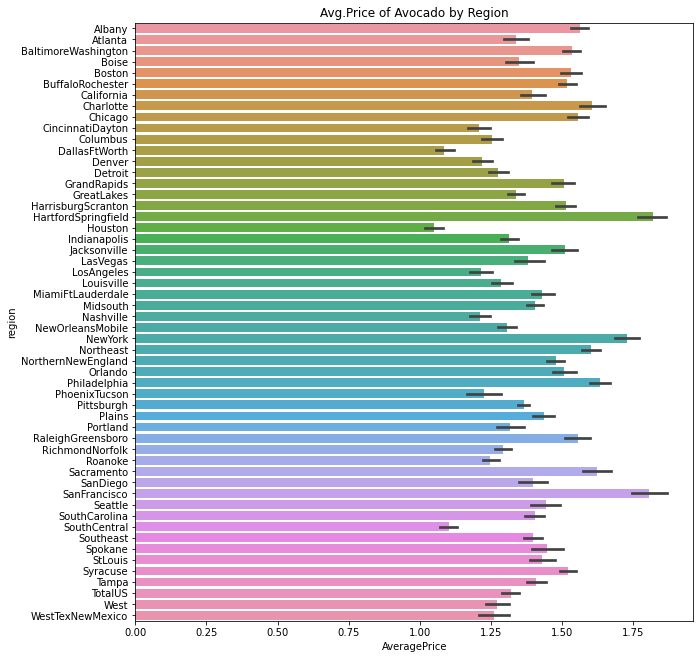

In [19]:
plt.figure(figsize=(10,11))
sns.barplot(x="AveragePrice",y="region",data= data)
plt.title("Avg.Price of Avocado by Region")
plt.show()

- AveragePRice has maximum in HartfordSpringfield region and low in South central.
- Upto 1.1 all region has same AveragePrice.

## 4. Encoding of DataFrame

### Converting Date into Day, year and Month

In [21]:
data['Date'].str.split('-').str[0]

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
18244    2018
18245    2018
18246    2018
18247    2018
18248    2018
Name: Date, Length: 18249, dtype: object

In [22]:
data['date'] = data['Date'].str.split('-').str[2]

In [23]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,06
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29


In [24]:

data['Month']= data['Date'].str.split('-').str[1]

In [25]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,04,02
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,01
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,01
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,01
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,07,01


In [26]:
data['date']= data['date'].astype(int)
data['Month']= data['Month'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
 14  date          18249 non-null  int32  
 15  Month         18249 non-null  int32  
dtypes: float64(9), int32(2), int64(2), object(3)
memory usage: 2.1+ MB


In [28]:
data.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)

In [29]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


### Label Encoding

In [30]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
 
data['type']= label_encoder.fit_transform(data['type'])
data['type'].unique()

array([0, 1])

In [31]:
# Conventional type has been converted into 0 and Organic has been converted into 1.
data['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [32]:
data['region']= label_encoder.fit_transform(data['region'])

In [33]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [34]:
data.shape

(18249, 14)

## 5. Describe the Dataset

In [35]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,15.662612,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,8.776281,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,8.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,16.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,23.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,31.000000,12.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in columns is considerable indicating presence of outliers.
 - Mean to Standrad of deviation difference is close.
 - Some features like 4046, 4225,4770,Total Bags, Large Bags and XLarge Bags is having min as 0.

## Correlation of the features with target column

In [113]:
data.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
date            0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

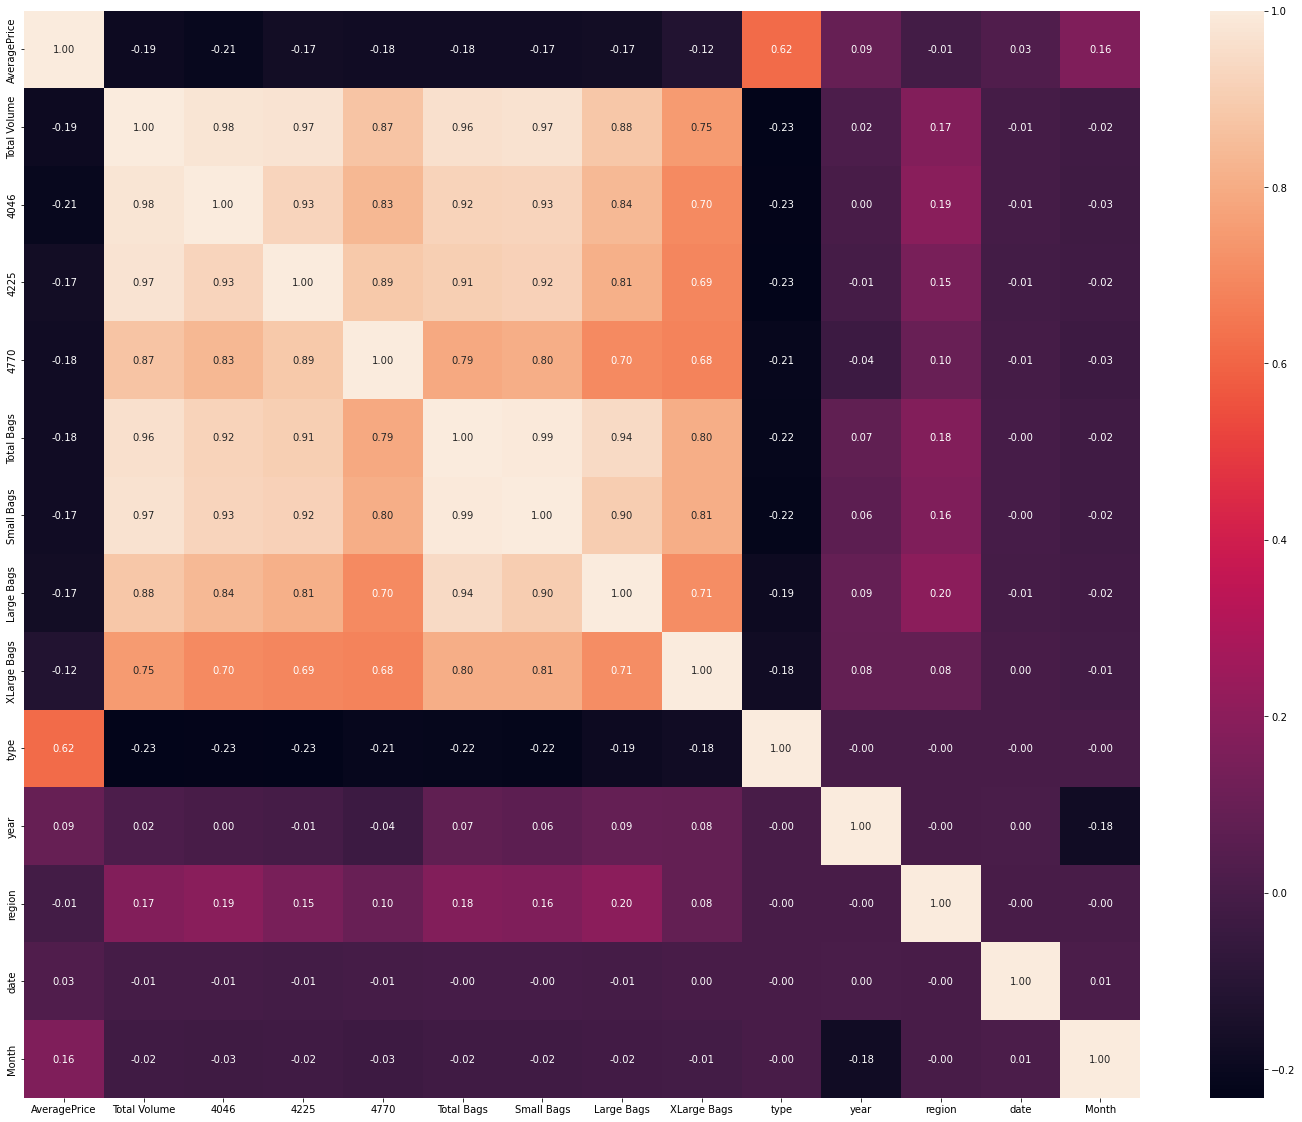

In [114]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation:

 - Date, month and year has very very low positive correlation with target column.
  1. Total Volume has 19% negative correlation with the target column.
  2. 4046 has 21% negative correlation with the target column.
  3. 4225 has 17% negative correlation with the target column.
  4. 4770 has 18% negative correlation with the target column.
  5. Total Bags has 18% negative correlation with target column.
  6. Small Bags has 17% negative correlation with target column.
  7. Large Bags has 17% negative correlation with target column.
  8. XLarge Bags has 12% negative correlation with target column.
  9. year has 9% positive correlation with target column.
  #### Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags are highly correlated to each other.

## Visualizing correlation of feature columns with label column.

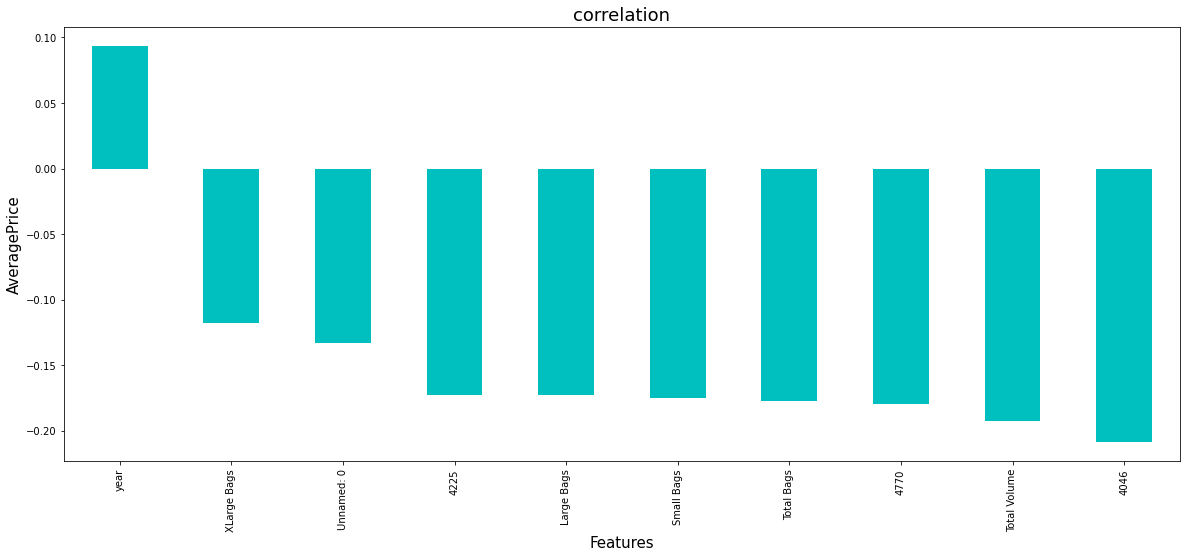

In [175]:
plt.figure(figsize = (20,8))
data.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

 - It is observed that Almost all features are negative correlated with AveragePrice except Year.

## Checking Distribution of data

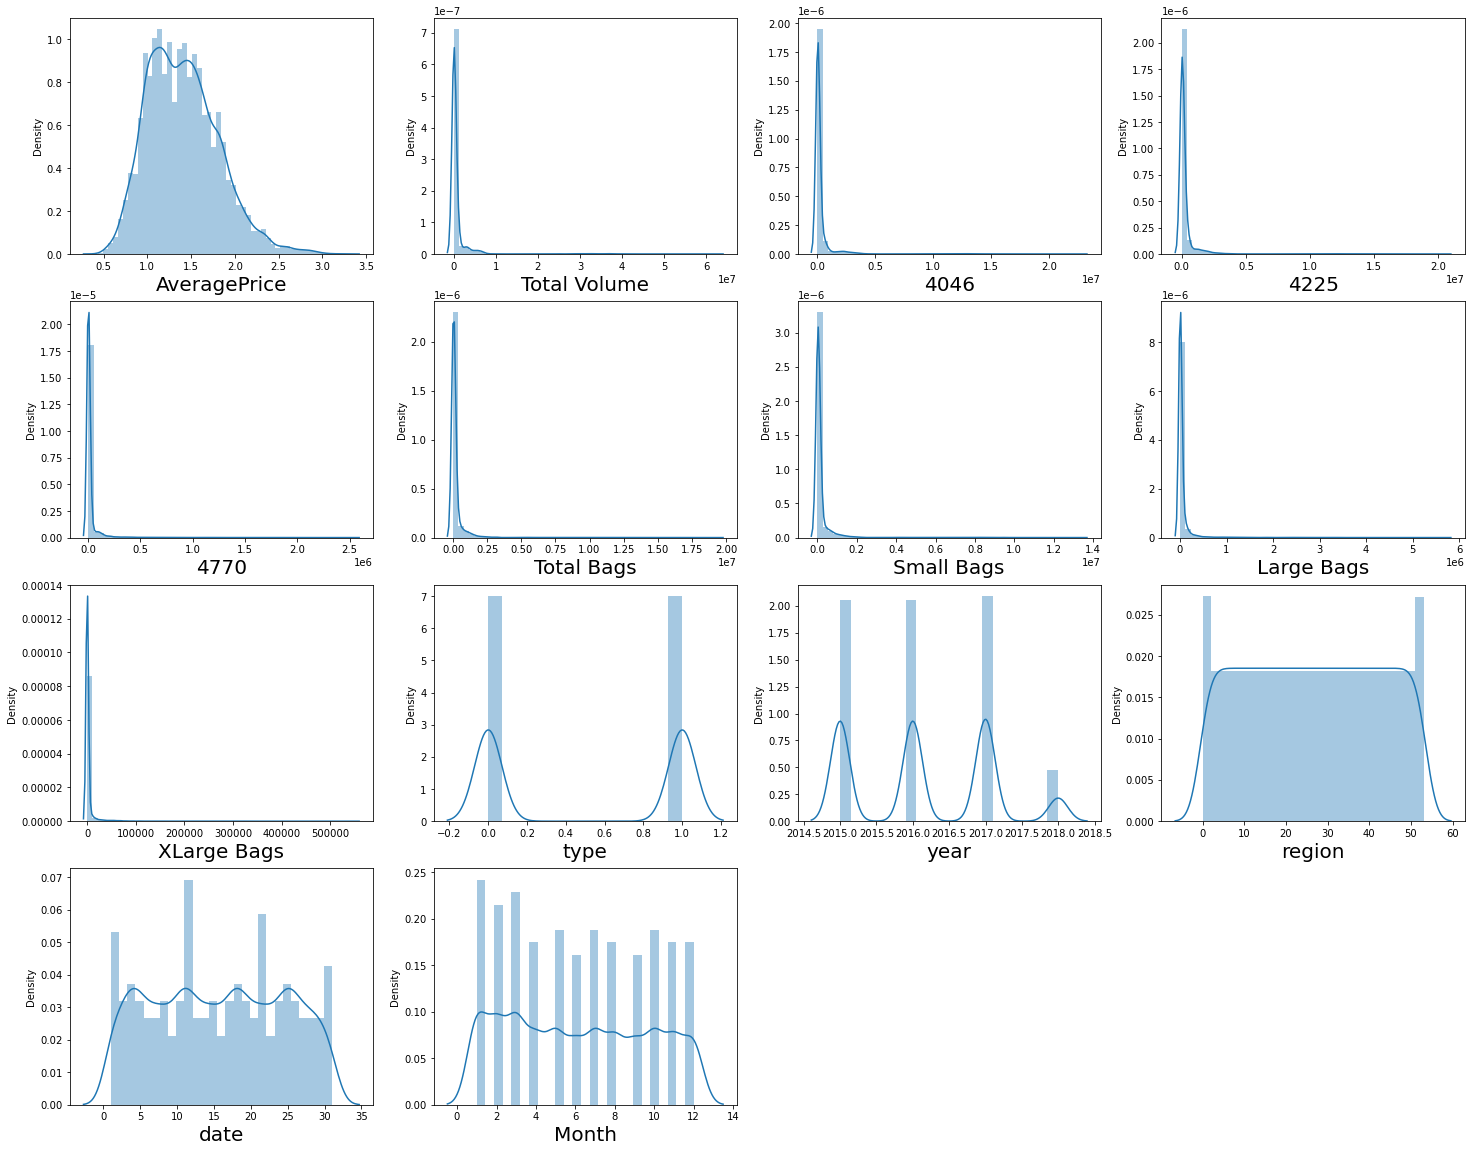

In [115]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

 - We can see, all features are positively skewed.
 - Type, year, region, date and month are categorical so not considerable for skewness.
 - Output column i.e. AveragePrice also having positive skewness

In [116]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
date             0.014310
Month            0.106617
dtype: float64

 - Outcome of the skewness: Skewness threshold is taken is +/-0.65.
 - Almost all continuous data are having skewness.

## Checking Outliers

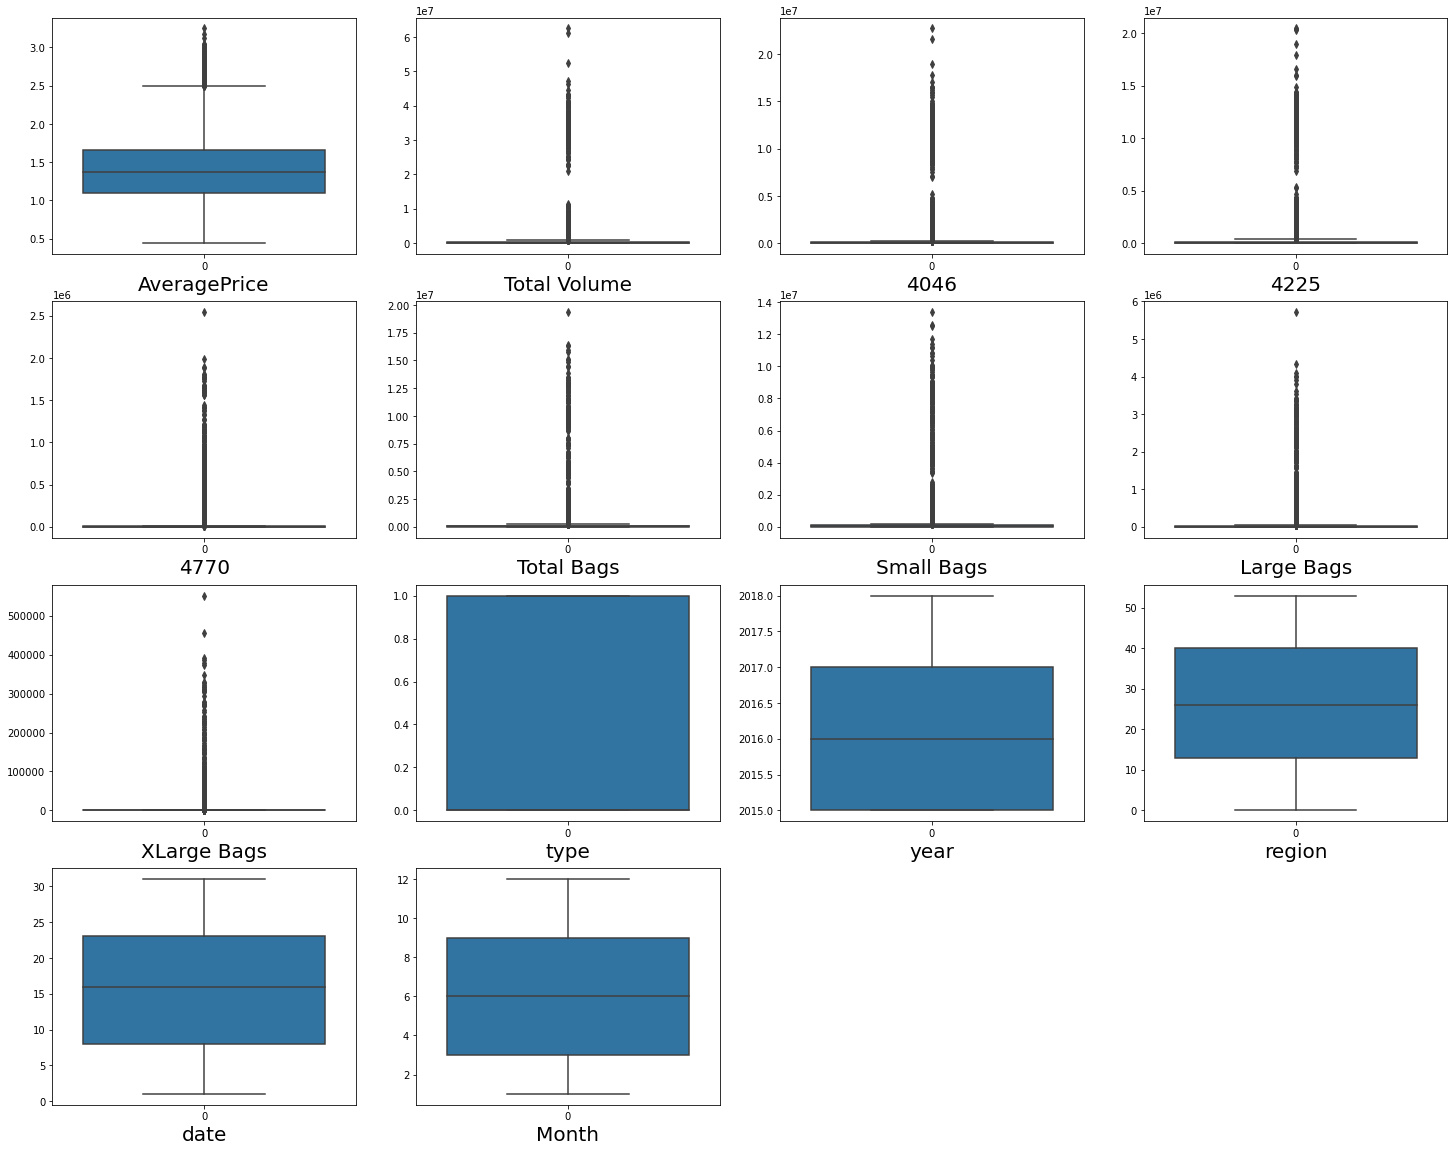

In [118]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=16:
        plt.subplot(4,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, all continuous data are having huge outliers.
- All categorical data has not outliers.

### Removing Outliers

In [17]:
from scipy.stats import zscore

z_score = zscore(data)
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [18]:
df.shape

(17651, 14)

### Percentage of data loss

In [121]:
data_loss = ((18249 - 17651)/18249*100)
print(data_loss,'%')

3.276891884486821 %


#### Data skewness before removing

In [122]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
date             0.014310
Month            0.106617
dtype: float64

#### Data skewness after removing

In [123]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
date            0.011778
Month           0.107408
dtype: float64

 - We can see, lots of skewness is removed.

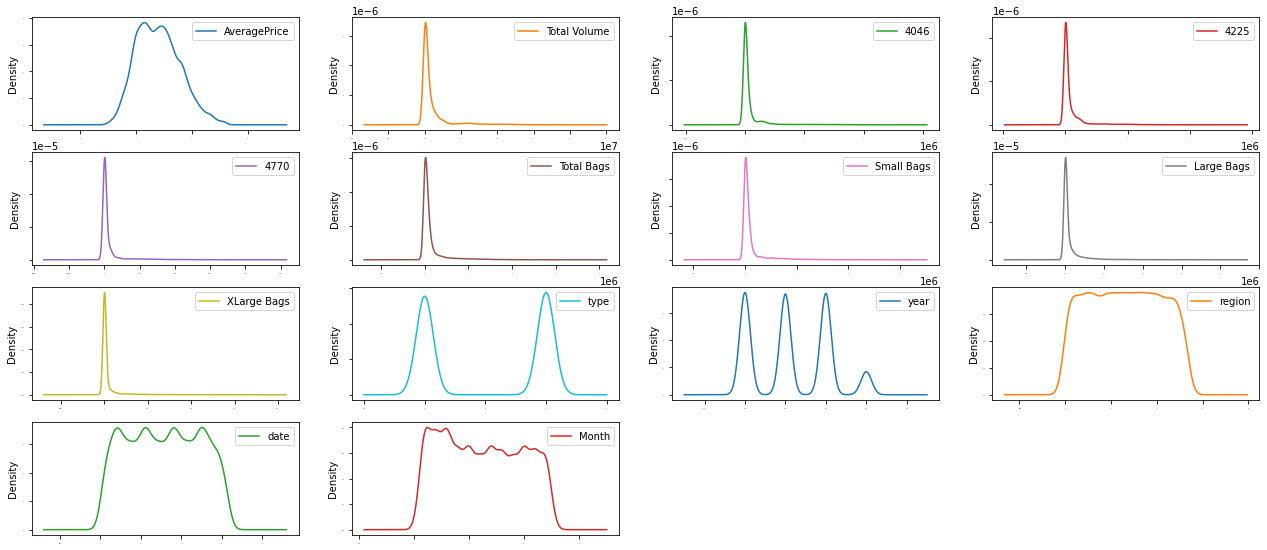

In [124]:
df.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

- We can see, distribution after removing skewness.

# 6. Building Model For Predicting Price (Regression Model)

## Checking Multicollinearity

In [44]:
x = df.drop(columns=['AveragePrice'],axis=1)
y = df['AveragePrice']

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()

In [49]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Total Volume,4.127969e+08
1,4046,7.777070e+07
2,4225,6.410838e+07
3,4770,4.787390e+05
4,Total Bags,1.924615e+13
5,Small Bags,1.275807e+13
6,Large Bags,1.290985e+12
7,XLarge Bags,6.647527e+09
8,type,1.232129e+00
9,year,1.132830e+00


 - If VIF > 10, It means multicollinearity is present.
 - MultiCollinearity exists in all continuous data features, Based on ANOVA F scores.
 - Those features is having lowest correlation with target column that feature will be dropped.

In [50]:
## Droping features
df.drop(["4046","4225", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

In [51]:
df.head()

,AveragePrice,Total Volume,4770,Total Bags,type,year,region,date,Month
0,1.33,64236.62,48.16,8696.87,0,2015,0,27,12
1,1.35,54876.98,58.33,9505.56,0,2015,0,20,12
2,0.93,118220.22,130.50,8145.35,0,2015,0,13,12
3,1.08,78992.15,72.58,5811.16,0,2015,0,6,12
4,1.28,51039.60,75.78,6183.95,0,2015,0,29,11


In [52]:
x = df.drop(columns=['AveragePrice'],axis=1)
y = df['AveragePrice']

In [53]:
x.head()

,Total Volume,4770,Total Bags,type,year,region,date,Month
0,64236.62,48.16,8696.87,0,2015,0,27,12
1,54876.98,58.33,9505.56,0,2015,0,20,12
2,118220.22,130.50,8145.35,0,2015,0,13,12
3,78992.15,72.58,5811.16,0,2015,0,6,12
4,51039.60,75.78,6183.95,0,2015,0,29,11


In [233]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [234]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [235]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.07532391, -0.22256614, -0.53750723, ..., -2.01058988,
         1.22756521,  1.49138301],
       [-0.14749743, -0.17522332, -0.49812847, ..., -2.01058988,
         0.53822879,  1.49138301],
       [ 0.20555557,  0.02392282, -0.56636909, ..., -2.01058988,
        -0.21895878,  1.49138301],
       ...,
       [-0.77527398,  0.4457104 , -0.5033658 , ...,  1.57828237,
         0.64019459, -1.64028838],
       [-0.70179733,  0.44539937, -0.43417613, ...,  1.57828237,
        -0.10529902, -1.64028838],
       [-0.66738095,  0.15776753, -0.39323595, ...,  1.57828237,
        -0.9581001 , -1.64028838]])

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [236]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5034387456643636 on Random State 500


In [237]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=500)

In [357]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
}

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [359]:
results

,MAE,MSE,R2-score
Linear Regression,0.219,0.076,0.503
Decision Tree,0.134,0.042,0.725
Random Forest,0.099,0.020,0.871
Support Vector Machines,0.144,0.039,0.748
K-nearest Neighbors,0.196,0.076,0.505
Gradient Boost Regressor,0.155,0.042,0.725


In [360]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,0.099000,0.020000,0.871000
Support Vector Machines,0.144000,0.039000,0.748000
Decision Tree,0.134000,0.042000,0.725000
Gradient Boost Regressor,0.155000,0.042000,0.725000
K-nearest Neighbors,0.196000,0.076000,0.505000
Linear Regression,0.219000,0.076000,0.503000


### Cross - Validation of the model

In [202]:
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()

#### Cross - Validation for Linear Regression

In [241]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- 0.24069324450200213


At cv:- 5
Cross validation score is:- 6.778327365153361


At cv:- 6
Cross validation score is:- -1.6423015680563664


At cv:- 7
Cross validation score is:- 0.8176355118703436


At cv:- 8
Cross validation score is:- -0.9553744839745165


At cv:- 9
Cross validation score is:- 2.2199166155495096




In [242]:
lsscore_selected = cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected)

The cv score is:  0.06778327365153361


#### Cross - validation For Random Forest Regressor

In [243]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- 2.9459969875655716


At cv:- 5
Cross validation score is:- 8.450267651804648


At cv:- 6
Cross validation score is:- 0.8009027333485222


At cv:- 7
Cross validation score is:- 14.710549160610409


At cv:- 8
Cross validation score is:- 17.427420795839023


At cv:- 9
Cross validation score is:- 25.40058347110073




In [244]:
lsscore_selected = cross_val_score(rf,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,)

The cv score is:  0.25844960078848317


#### Cross - validation For Decision Tree Regressor

In [245]:
for j in range(4,10):
    isscore = cross_val_score(dt,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- -59.15372862660482


At cv:- 5
Cross validation score is:- -38.19996574081533


At cv:- 6
Cross validation score is:- -61.073597975862


At cv:- 7
Cross validation score is:- -34.217082302299644


At cv:- 8
Cross validation score is:- -47.51283662429629


At cv:- 9
Cross validation score is:- -30.280038893347005




In [246]:
lsscore_selected = cross_val_score(dt,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,)

The cv score is:  -0.30401548293136305


#### Cross - validation For KNeighborsRegressor

In [247]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- -26.834567174675563


At cv:- 5
Cross validation score is:- -3.8654525709540755


At cv:- 6
Cross validation score is:- -15.56672109452781


At cv:- 7
Cross validation score is:- -15.612584522256098


At cv:- 8
Cross validation score is:- -16.424607018859998


At cv:- 9
Cross validation score is:- -15.292436936561696




In [248]:
lsscore_selected = cross_val_score(knn,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected)

The cv score is:  -0.038654525709540755


### Cross - validation For SVR

In [249]:
for j in range(4,10):
    isscore = cross_val_score(svr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- -68.33936155801136


At cv:- 5
Cross validation score is:- -38.316455356318755


At cv:- 6
Cross validation score is:- -18.905576192240737


At cv:- 7
Cross validation score is:- -2.312765045758658


At cv:- 8
Cross validation score is:- 8.418485398056236


At cv:- 9
Cross validation score is:- 7.380263290385039




In [250]:
lsscore_selected = cross_val_score(svr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected)

The cv score is:  0.08418485398056236


### Corss - Validation for GradientBoosting Regressor

In [358]:
gbr = GradientBoostingRegressor()

In [361]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('\n')

At cv:- 4
Cross validation score is:- 30.70931772563359


At cv:- 5
Cross validation score is:- 34.442331150623176


At cv:- 6
Cross validation score is:- 31.395156862584432


At cv:- 7
Cross validation score is:- 34.07665367300668


At cv:- 8
Cross validation score is:- 37.06865629418438


At cv:- 9
Cross validation score is:- 39.103683962282894




In [362]:
lsscore_selected = cross_val_score(gbr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected)

The cv score is:  0.3910368396228289


### Regularization

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [252]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.0001, 'random_state': 0}

In [253]:
s = Lasso(alpha=0.0001,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

0.0

In [254]:
pred = r2_score(y_test,pred_ls)
pred*100

-0.013490642586422297

In [255]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

-144.6214478704042

## 7. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Gradient Boosting  Regressor is the best model. It has least difference between accuracy score and cross validation score. 

## 8. Hyperparameter tuning

In [260]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [261]:
gbr = GradientBoostingRegressor()

In [19]:
parameters = {'learning_rate':[0.01,0.1,0.2,0.3,0.4],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
              'n_estimators':[150,200,250]
             }

In [368]:
rt = RandomizedSearchCV(gbr,param_distributions=parameters)

In [369]:
rt.fit(X_train,y_train)

rt.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

In [371]:
gbr = GradientBoostingRegressor(min_samples_split=10,min_samples_leaf=7,max_depth=10,criterion='mse',n_estimators=150,learning_rate=0.02)

In [373]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
print(r2_score(y_test,y_pred))

0.8628702648157744


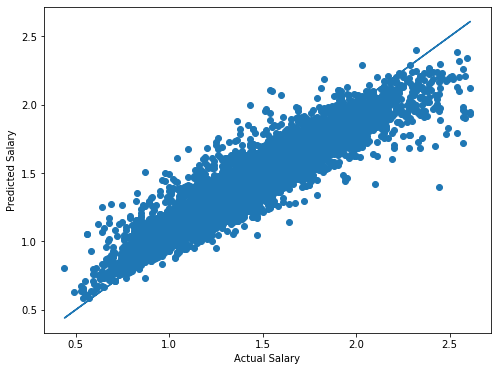

In [374]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

## 9. Documenting the finding


 - No duplicates values are present.
 - No null values present in dataset.
 - Total valume hasn't direct relationship with average price.
 - After 0.7, AveragePrice is having slightly negative relationship with 4046.
 - After 0.7, AveragePrice is having slightly negative relationship with 4225.
 - But 4770 is lies maximum in the range of 0.3 to 1.7 of AveragePrice.
 - Total Bags is slightly increasing upto 0.5 to 0.8.
 - AveragePrice is highest in the 0 to 0.2 in this range of Samll Bags.
 - Large Bags is slightly increasing with respect to Average price.
 - Organic avocado is having maximum Average price then conventional avocado.
 - 2017 in this year, AvearagePrice of avocado is higher then 2015 and 2018.
 - SanFrancisco region is having maximum Average Price.
 - CincinnatiDayton region is having minimum Average Price.
 - SanFrancisco has maximum total valume of avocado followed by RaleighGreensboro.
 - In which SanFrancisco is a amongs top region where 4046 type grade of avocado maximum sold followed by Tampa.
 - Sanfrancisco region is consume/sells highest avocado then other.
 - But in year 2018 avocado consumption/selling is very low comparatively ohter year.
 - In the year of 2017 both conventinal and oragnic type of avocado AveragePrice is high.
 - In 2018 the conventional perticularly avocado grade 4046 is higher than other.
 - In 2015 and 2018, the conventional perticularly avocado grade 4225 is higher than other.
 - In 2016, the conventional perticularly avocado grade 4770 is higher than other.
 - All the year both convetional and organic type of avocado is increasing with respect to Total Bags.
 - In the year 2017, the AveragePrice is high followed by 2015 and 2018.
 - In the year of 2018, avocado grade 4046 is higher than other.
 - From 2015 to 2017 consumption of grade 4046 type avocado is decreasing in nature.
 - In the year of 2017, consumption of grade 4046 type avocado is low after 2017 it slightly increasing.
 - We can see, Jan has a highest sale of avocado followed by March.June has a lowest sale of avocado.

## 10. Model Save

In [375]:
import joblib
joblib.dump(rf,"avocado_price_prediction.pkl")

['avocado_price_prediction.pkl']

### Loading The Model

In [376]:
mod=joblib.load("avocado_price_prediction.pkl")

In [377]:
print(mod.predict(x))

[1.26831429 1.32568571 0.97591429 ... 1.82627143 1.81242857 1.46071579]


In [378]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,1.268314,1.33
1,1.325686,1.35
2,0.975914,0.93
3,1.231857,1.08
4,1.262943,1.28
5,1.260914,1.26
6,1.213943,0.99
7,1.047467,0.98
8,1.088043,1.02
9,1.136971,1.07


# 11. Building Model For Predicting Region (Classification Model)

In [54]:
df.head()

,AveragePrice,Total Volume,4770,Total Bags,type,year,region,date,Month
0,1.33,64236.62,48.16,8696.87,0,2015,0,27,12
1,1.35,54876.98,58.33,9505.56,0,2015,0,20,12
2,0.93,118220.22,130.50,8145.35,0,2015,0,13,12
3,1.08,78992.15,72.58,5811.16,0,2015,0,6,12
4,1.28,51039.60,75.78,6183.95,0,2015,0,29,11


## Checking Multicollinearity

In [55]:
x = df.drop(columns=['region'],axis=1)
y = df['region']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()

In [60]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,AveragePrice,1.729986
1,Total Volume,7.593517
2,4770,1.765562
3,Total Bags,6.472996
4,type,1.796983
5,year,1.149081
6,date,1.001837
7,Month,1.091851


 - If VIF > 10, It means multicollinearity is present.
 - MultiCollinearity is not present, Based on ANOVA F scores.

In [61]:
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

 - We can see all classes are almost equally distributed.
 - So no need to do data balancing.

In [62]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [63]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.11782446, -0.07532391, -0.22256614, ..., -1.21061818,
         1.22756521,  1.49138301],
       [-0.06432986, -0.14749743, -0.17522332, ..., -1.21061818,
         0.53822879,  1.49138301],
       [-1.29886469,  0.20555557,  0.02392282, ..., -1.21061818,
        -0.21895878,  1.49138301],
       ...,
       [ 1.18432357, -0.77527398,  0.4457104 , ...,  1.97873539,
         0.64019459, -1.64028838],
       [ 1.31329624, -0.70179733,  0.44539937, ...,  1.97873539,
        -0.10529902, -1.64028838],
       [ 0.61561867, -0.66738095,  0.15776753, ...,  1.97873539,
        -0.9581001 , -1.64028838]])

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### finding Best Random state

In [393]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.31023413897280966 on Random State 203


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=203)

### 11.1 Logistic Regression

In [395]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.31023413897280966

In [396]:
from sklearn.model_selection import cross_val_score

In [397]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

#### Cross - Validation for Logistic Regression

In [398]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 20.072535628374013
accuracy_score is:- 31.023413897280967


At cv:- 5
Cross validation score is:- 23.228165267084012
accuracy_score is:- 31.023413897280967


At cv:- 6
Cross validation score is:- 22.321609294291623
accuracy_score is:- 31.023413897280967


At cv:- 7
Cross validation score is:- 24.75224428384891
accuracy_score is:- 31.023413897280967


At cv:- 8
Cross validation score is:- 24.542354418336775
accuracy_score is:- 31.023413897280967


At cv:- 9
Cross validation score is:- 25.329648499113617
accuracy_score is:- 31.023413897280967




In [399]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.25329648499113616 
The accuracy score is:  0.31023413897280966


In [70]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
       
    

### 11.2 Random Forest Classifier

In [401]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 68.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77        97
           1       0.55      0.52      0.54       109
           2       0.90      0.90      0.90        99
           3       0.70      0.70      0.70       106
           4       0.73      0.73      0.73        95
           5       0.62      0.69      0.65        91
           6       0.91      0.97      0.94        93
           7       0.72      0.80      0.76        97
           8       0.91      0.91      0.91       111
           9       0.43      0.49      0.46        94
          10       0.47      0.41      0.44        96
          11       0.60      0.65      0.63       101
          12       0.76      0.88      0.82        93
          13       0.53      0.

#### Cross - Validation for Random Forest classifier

In [402]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [403]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 31.986351316342816
accuracy_score is:- 68.69335347432025


At cv:- 5
Cross validation score is:- 38.22457825989636
accuracy_score is:- 68.69335347432025


At cv:- 6
Cross validation score is:- 36.80205380643709
accuracy_score is:- 68.69335347432025


At cv:- 7
Cross validation score is:- 46.00677072307133
accuracy_score is:- 68.69335347432025


At cv:- 8
Cross validation score is:- 46.61294669026804
accuracy_score is:- 68.69335347432025


At cv:- 9
Cross validation score is:- 46.25077734823277
accuracy_score is:- 68.69335347432025




In [404]:
lsscore_selected = cross_val_score(rf,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.4661287480163873 
The accuracy score is:  0.6869335347432024


### 11.3 Gradient Boosting Classifier

In [405]:
gbt=GradientBoostingClassifier()
gbt.fit(x_train,y_train)

metric_score(gbt,x_train,x_test,y_train, y_test, train=True)

metric_score(gbt,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 86.96%

==========================Test Result=======================
Accuracy Score: 58.29%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.74      0.70        97
           1       0.49      0.38      0.43       109
           2       0.74      0.76      0.75        99
           3       0.71      0.68      0.69       106
           4       0.55      0.58      0.56        95
           5       0.44      0.55      0.49        91
           6       0.87      0.81      0.84        93
           7       0.71      0.75      0.73        97
           8       0.89      0.86      0.87       111
           9       0.37      0.45      0.40        94
          10       0.30      0.26      0.28        96
          11       0.48      0.62      0.54       101
          12       0.62      0.73      0.67        93
          13       0.51      0.4

#### Cross - Validation for Gradient Boosting Classifier 

In [417]:
pred_gbt = gbt.predict(x_test)
accu = accuracy_score(y_test,pred_gbt)

In [418]:
for j in range(4,10):
    cross = cross_val_score(gbt,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 31.748351168835015
accuracy_score is:- 58.2892749244713


At cv:- 5
Cross validation score is:- 32.24829374467986
accuracy_score is:- 58.2892749244713


At cv:- 6
Cross validation score is:- 33.827647719139605
accuracy_score is:- 58.2892749244713


At cv:- 7
Cross validation score is:- 41.15792360597851
accuracy_score is:- 58.2892749244713


At cv:- 8
Cross validation score is:- 40.84589450199871
accuracy_score is:- 58.2892749244713


At cv:- 9
Cross validation score is:- 41.60546213514882
accuracy_score is:- 58.2892749244713




In [419]:
lsscore_selected = cross_val_score(gbt,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.4165077604290575 
The accuracy score is:  0.582892749244713


## 11.4 SVC

In [408]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 52.25%

==========================Test Result=======================
Accuracy Score: 44.09%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.46      0.77      0.58        97
           1       0.32      0.28      0.30       109
           2       0.65      0.73      0.69        99
           3       0.62      0.48      0.54       106
           4       0.35      0.29      0.32        95
           5       0.27      0.44      0.33        91
           6       0.84      0.56      0.67        93
           7       0.45      0.74      0.56        97
           8       0.83      0.83      0.83       111
           9       0.31      0.29      0.30        94
          10       0.23      0.21      0.22        96
          11       0.22      0.37      0.28       101
          12       0.44      0.63      0.52        93
          13       0.46      0.2

#### Cross - Validation for SVC

In [409]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [410]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 27.890612432689295
accuracy_score is:- 44.089879154078545


At cv:- 5
Cross validation score is:- 32.67793071965585
accuracy_score is:- 44.089879154078545


At cv:- 6
Cross validation score is:- 31.29546270396891
accuracy_score is:- 44.089879154078545


At cv:- 7
Cross validation score is:- 36.53555067758236
accuracy_score is:- 44.089879154078545


At cv:- 8
Cross validation score is:- 35.62291856743626
accuracy_score is:- 44.089879154078545


At cv:- 9
Cross validation score is:- 35.68529293242235
accuracy_score is:- 44.089879154078545




In [411]:
lsscore_selected = cross_val_score(svc,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.36535550677582357 
The accuracy score is:  0.4408987915407855


## 11.5 KNN

In [412]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 53.37%

==========================Test Result=======================
Accuracy Score: 26.47%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.22      0.45      0.29        97
           1       0.10      0.28      0.15       109
           2       0.33      0.61      0.43        99
           3       0.31      0.44      0.37       106
           4       0.13      0.27      0.17        95
           5       0.18      0.42      0.25        91
           6       0.41      0.47      0.44        93
           7       0.19      0.40      0.26        97
           8       0.56      0.52      0.54       111
           9       0.07      0.16      0.09        94
          10       0.04      0.08      0.06        96
          11       0.12      0.21      0.16       101
          12       0.29      0.44      0.35        93
          13       0.16      0.1

#### Cross - Validation for KNN

In [413]:
pred_knn = knn.predict(x_test)

accu = accuracy_score(y_test,pred_knn)

In [414]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 17.794940882856817
accuracy_score is:- 26.472809667673715


At cv:- 5
Cross validation score is:- 20.434885510207852
accuracy_score is:- 26.472809667673715


At cv:- 6
Cross validation score is:- 19.126336340660842
accuracy_score is:- 26.472809667673715


At cv:- 7
Cross validation score is:- 22.128647513149655
accuracy_score is:- 26.472809667673715


At cv:- 8
Cross validation score is:- 20.411757015611336
accuracy_score is:- 26.472809667673715


At cv:- 9
Cross validation score is:- 21.01781546129824
accuracy_score is:- 26.472809667673715




In [415]:
lsscore_selected = cross_val_score(knn,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.22128647513149655 
The accuracy score is:  0.26472809667673713


## 12. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Gradient Boosting  Regressor is the best model. It has low difference between accuracy score and cross validation i.e.17. It lower than RandomForest.

## 13. Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
gbc = GradientBoostingClassifier()

### As we find before as Hyperparameter parameter I used those best parameter for tuning the model. Dataset is same our model is same.

In [67]:
parameters = {'learning_rate':[0.01,0.1,0.2,0.3,0.4],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
              'n_estimators':[150,200,250]
             }

In [68]:
rt = RandomizedSearchCV(gbc,param_distributions=parameters)

In [ ]:
rt.fit(x_train,y_train)

rt.best_params_

In [76]:
gbc = GradientBoostingClassifier(min_samples_split=10,min_samples_leaf=7,max_depth=10,criterion='mse',n_estimators=150,learning_rate=0.01)

In [77]:
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 98.92%

==========================Test Result=======================
Accuracy Score: 63.12%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        97
           1       0.57      0.49      0.52       109
           2       0.79      0.87      0.83        99
           3       0.65      0.62      0.64       106
           4       0.69      0.62      0.66        95
           5       0.58      0.60      0.59        91
           6       0.90      0.88      0.89        93
           7       0.74      0.69      0.71        97
           8       0.86      0.84      0.85       111
           9       0.46      0.48      0.47        94
          10       0.37      0.31      0.34        96
          11       0.54      0.63      0.58       101
          12       0.65      0.76      0.70        93
          13       0.45      0.5

## 14. Model Save

In [78]:
import joblib
joblib.dump(gbc,"avocado_region_prediction.pkl")

['avocado_region_prediction.pkl']

### Loading the Model

In [79]:
mod=joblib.load("avocado_region_prediction.pkl")

In [80]:
print(mod.predict(x))

[ 0  0  0 ... 53 53 53]


In [86]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.sample(10)

,Predictions,Actual Values
10392,24,24
16358,4,30
7457,34,34
5025,42,42
12700,14,14
4641,35,35
7400,53,33
16075,25,25
5008,42,42
15150,7,7
